# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 2</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC, Australia.

### <span style="color:#0b486b">Due: 5pm, 22th May 2020 </span>
---

## <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 2. Some sections have been partially completed  to help you get started. **The total marks for this notebook is 200**.

* Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment2_instructions.pdf*  to know what else you need to complete for this assignment as well submission instruction. <br><br>

* Instructions marked with **(D)** and **(HD)** are for students aiming at high grades. They are more involved and can be completed after all other instructions.


* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL**, there will be place where you **must** provide your own comment when instructed. <br><br>


### Submission

You are required to submit **five** files: <br><br>

* The source of your solution notebook: **[groupID]_assignment2_solution.ipynb**
* An exported version of your output: **[groupID]_assignment2_output.html**  
* Three json data files storing tweets collected for the three keywords, named **[groupID]_[w1].json**, **[groupID]_[w2].json**, **[groupID]_[w3].json** where **[w1], [w2], [w3]** are the three keywords you have been provided.
    


As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instruction** mean the instructions given to you to complete the designated section.

## <span style="color:#0b486b">Part 1: Crawling and Storing Tweet Data</span>


The first part of the assignment examines your skills and knowledge to query tweets and store them in json files. For **each** provided keyword, your tasks are:

* Crawl all tweets which contain this keyword written in English and geocoded within the location, provided for your group.
* Store the tweets collected into json files.

***Follow the instructions below to complete your task***.

**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the following cell.

In [1]:
import sys
sys.path.append("C:\Python38\Lib\site-packages")

#Import packages needed for processing
import re
import json
import xml
import numpy as np
from collections import Counter
from TwitterAPI import TwitterAPI # in case you need to install this package, see practical 6
from sklearn.cluster import KMeans

import requests

# disabling urllib3 warnings
requests.packages.urllib3.disable_warnings()

import matplotlib.pyplot as plt
%matplotlib inline

#If you need add any additional packages, then add them below

**Instruction 1.1**. Enter your provided keywords to the variable **keywords** below.

[**Total mark: 3**]

In [2]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

#Enter the list of three keywords you selected to the variables keywords below
#e.g. keywords = ["abc", "def", "ghi"]

keywords =  ['blow', 'walk', 'book']

**Instruction 1.2**. Before you can perform a query to Twitter API, you need to supply authentication information. Practical sessions 6 and 7 show you how to obtain this information. **Your task is to supply the authentication information in the cell below**.

**Note**: You might decide to regenerate this authentication from the pracs if you would like too. <span style="color:red">After the assignment has been marked, you are strongly recommended to regenerate this authentication information from your account to maintain your privacy.</span> 


[**Total mark: 5**]

In [3]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# Twitter API credentials 
CONSUMER_KEY = "nyEG6GBrJUcrG3Pns120fZO7L"
CONSUMER_SECRET = "w01ruJ2RwvyX8cAg8XxCleamZFtuQao8Vulnp81HGi4VW0Xosw"
OAUTH_TOKEN = "134614257-nUu1wfkuFmT4559lszVOLuqexWyHaAH4hooJmlvl"
OAUTH_TOKEN_SECRET = "ytgC8psyPRNuBBdsir3ZU9PcBHKYMJY01Ua2WHbqv3QzF"

# Authonticating with your application credentials
api = TwitterAPI(CONSUMER_KEY,
                 CONSUMER_SECRET,
                 OAUTH_TOKEN,
                 OAUTH_TOKEN_SECRET) #INSERT YOUR CODE HERE# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

**Note**: As you have learned from the pracical sessions, to perform a query from Twitter API for a particular geo-coded location you need a center point and a radius. The center point is specified by its (latitude,longitute) pair. **The information below has been provided to you to perform the query in the subsequent tasks**.

In [4]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# geo coordinations of the desired place
PLACE_LAT = 37.7749
PLACE_LON = -122.4194
PLACE_RAD = 200

**Instruction 1.3**. For each keyword, you are required to crawl at least **200** tweets (the more the better) using the Twitter API. However, as you have learned from the practical sessions, each query will return a maximum of only **100** tweets. Therefore, subsequent query **must** use the maximum Tweet ID from the previous batch to crawl the next lot.

The following function, called ***retrieve_tweets()***, has been **partially** implemented to automatically download tweets until it reaches the maximum number of tweets needed. 

For example, a function call
```
retrieve_tweets(api, 'car', 50, 200, latitude, longitude, radius)
```
will attempt to crawl a total of at least 200 tweets that contains the word 'car' for a location with given latitude, longidude and radius around it. Within each single query, it will attempt to obtain 50 tweets.

**Your task is to walk through this function and enter your own codes where instructed to complete the function**.

[**Total mark: 10**]

In [6]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
You will be required to insert your own codes to complete this function. 
Walk through this function and enter your own codes where instructed.
'''
def retrieve_tweets(api, keyword, batch_count, total_count, latitude, longitude, radius):
    """
    collects tweets using the Twitter search API
    
    api:         Twitter API instance
    keyword:     search keyword
    batch_count: maximum number of tweets to collect per each request
    total_count: maximum number of tweets in total
    """

    
    # the collection of tweets to be returned
    tweets_unfiltered = []
    tweets = []
    
    # the number of tweets within a single query
    batch_count = str(batch_count)
    
    '''
    You are required to insert your own code where instructed to perform the first query to Twitter API.
    Hint: revise the practical session on Twitter API on how to perform query to Twitter API.
    '''
    # per the first query, to obtain max_id_str which will be used later to query sub
    resp = api.request('search/tweets', {'q': keyword, #INSERT YOUR CODE - keyword must be passed in to call function
                                         'count': 200, #INSERT YOUR CODE - count is always 200 
                                         'lang':'en',
                                         'result_type':'recent',
                                         'geocode':'{},{},{}mi'.format(latitude, longitude, radius)})
    
    # store the tweets in a list

    # check first if there was an error
    if ('errors' in resp.json()):
        errors = resp.json()['errors']
        if (errors[0]['code'] == 88):
            print('Too many attempts to load tweets.')
            print('You need to wait for a few minutes before accessing Twitter API again.')
    
    if ('statuses' in resp.json()):
        tweets_unfiltered += resp.json()['statuses']
        tweets = [tweet for tweet in tweets_unfiltered if ((tweet['retweeted'] != True) and ('RT @' not in tweet['text']))]
    
        # find the max_id_str for the next batch
        ids = [tweet['id'] for tweet in tweets_unfiltered]
        max_id_str = str(min(ids))

        # loop until as many tweets as total_count is collected
        number_of_tweets = len(tweets)
        while number_of_tweets < total_count:

            resp = api.request('search/tweets', {'q': keyword, #INSERT YOUR CODE - again, keyword must be passed in
                                             'count': 200, #INSERT YOUR CODE
                                             'lang':'en',
                                             'result_type': 'recent', #INSERT YOUR CODE - 'recent' type is passed in 
                                             'max_id': max_id_str,
                                             'geocode': f"{latitude},{longitude},{radius}mi"} #INSERT YOUR CODE
                              )

            if ('statuses' in resp.json()):
                tweets_unfiltered += resp.json()['statuses']
                tweets = [tweet for tweet in tweets_unfiltered if ((tweet['retweeted'] != True) and ('RT @' not in tweet['text']))]
 
                ids = [tweet['id'] for tweet in tweets_unfiltered]
                max_id_str = str(min(ids))
            
                number_of_tweets = len(tweets)
        
            print("{} tweets are collected for keyword {}. Last tweet created at {}".format(number_of_tweets, 
                                                                                    keyword, 
                                                                                    tweets[number_of_tweets-1]['created_at']))
    return tweets

**Instruction 1.4**. After having defined the ***retrieve_tweets()*** function above, you are now ready to use this function to collect your tweets. Your task is to write the code to perform three function calls, each of which corresponds to one keyword. And, you are required to collect at least **200** tweets for each keyword (the more the better).

[**Total mark: 9**]

In [7]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Your task is to write the code to perform three function calls, each corresponds to one keyword. 
And, you are required to collect at least 200 tweets for each key word.
'''

# Collecting the tweets for three assigned keywords, 
# Your function call should look like this:  retrieve_tweets(api,'keyword',single_count,total_count)

k1_tweets = retrieve_tweets(api, keywords[0], 200, 200, PLACE_LAT, PLACE_LON, PLACE_RAD) 
k2_tweets = retrieve_tweets(api, keywords[1], 200, 200, PLACE_LAT, PLACE_LON, PLACE_RAD)
k3_tweets = retrieve_tweets(api, keywords[2], 200, 200, PLACE_LAT, PLACE_LON, PLACE_RAD)

# PLEASE NOTE THAT IF YOU RUN THIS CELL, IT MIGHT TAKE A WHILE TO DOWNLOAD ALL THE TWEETS REQUIRED.
# MAKE SURE THAT YOU WAIT UNTILL THE CELL FINISHES RUNNING.

138 tweets are collected for keyword blow. Last tweet created at Wed May 20 17:54:41 +0000 2020
202 tweets are collected for keyword blow. Last tweet created at Wed May 20 05:34:24 +0000 2020
85 tweets are collected for keyword walk. Last tweet created at Thu May 21 02:44:30 +0000 2020
126 tweets are collected for keyword walk. Last tweet created at Thu May 21 02:00:43 +0000 2020
155 tweets are collected for keyword walk. Last tweet created at Thu May 21 01:28:05 +0000 2020
171 tweets are collected for keyword walk. Last tweet created at Thu May 21 00:43:38 +0000 2020
207 tweets are collected for keyword walk. Last tweet created at Wed May 20 23:52:17 +0000 2020
121 tweets are collected for keyword book. Last tweet created at Thu May 21 03:14:55 +0000 2020
184 tweets are collected for keyword book. Last tweet created at Thu May 21 02:29:18 +0000 2020
237 tweets are collected for keyword book. Last tweet created at Thu May 21 01:44:38 +0000 2020


**Instruction 1.5**. To verify the downloading process, write your code to print out the number of tweets which has been collected for each keyword.

[**Total mark: 3**]

In [8]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to print the number of tweets have been collected for each keyword
'''
print(f"blow: {k1_tweets[3]}")
print(f"walk: {k2_tweets[3]}")
print(f"book: {k3_tweets[3]}")

blow: {'created_at': 'Thu May 21 04:50:42 +0000 2020', 'id': 1263331358488686592, 'id_str': '1263331358488686592', 'text': "@charliejane I like the second, bc somehow encountering 'blow up his life' first is a bit overwhelming (not really… https://t.co/y1zJohwwYx", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'charliejane', 'name': 'Charlie Jane Anders (pls subscribe to @OOACpod!)', 'id': 16356796, 'id_str': '16356796', 'indices': [0, 12]}], 'urls': [{'url': 'https://t.co/y1zJohwwYx', 'expanded_url': 'https://twitter.com/i/web/status/1263331358488686592', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': 1263327652586242048, 'in_reply_to_status_id_str': '1263327652586242048', 'in_reply_to_user_id': 16356796, 'in_reply_to_user_id_str': '16356796'

**Note:** Each tweet is stored in a dictionary where its keywords are fields in the tweet and values are the information of the fields. The cell below print the type of a tweet.

In [9]:
# Data type of tweets
print(type(k1_tweets[0]))

<class 'dict'>


**Instruction 1.6**.  To examine what the tweets look like, in the cell below write your code to print out all fields of the first tweet in `k1_tweets` and print out the text of the first tweet collected for each keyword.

[**Total mark: 6**]

In [10]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to print out all fields of the first tweet
Hint: You might want to use method keys() of the dictionary
'''
# INSERT YOUR CODE HERE



'''
Write your code to print out the text of the first  tweet collected for each keyword.
'''

print("\nThe text of the first tweet for \"{}\":\n".format(keywords[0]))
# INSERT YOUR CODE HERE


print("\nThe text of the first tweet for \"{}\":\n".format(keywords[1]))
# INSERT YOUR CODE HERE


print('\nThe text of the first tweet for \"{}\":\n'.format(keywords[2]))
# INSERT YOUR CODE HERE



The text of the first tweet for "blow":


The text of the first tweet for "walk":


The text of the first tweet for "book":



**Note**. When collecting data from the Internet, such as Twitter, it is important that we store the data collected in an appropriate format for later data analysis task. We have learned that json is a poplular lightweight data format that can be handy to store unstructured data. For example, with NoSQL we can directly query these files in a 'scaling out' fashion. These technologies are representative features of Big Data Analytics.

The following function has been designed for you to save an object which is a list of dictionaries (such as k1_tweets variable) to a json file. **You will need this function for your next task**.

In [12]:
def save_to_json(obj, filename):
    """
    saves a list of dictionaries into a json file
    
    obj: list of dictionaries
    filename: filename
    """
    with open(filename, 'w') as fp:
        json.dump(obj, fp, indent=4, sort_keys=True)   

**Instruction 1.7**. Use the function ***save_to_json()*** defined above, for each collection of tweets you have crawled for each keyword, save them into a file named **w.json** where **w** is the keyword.

For example, if your keywords are 'w1', 'w2' and 'w3', then your code must generate three file w1.json, w2.json and w3.json. **Important: you must submit these files together with your notebook solution**.

[**Total mark: 9**]

In [13]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Use the save_to_json() function defined above, for the collection of tweets 
you have crawled for each keyword, save them into a file named w.json where w is the keyword, taken from keywords list.
'''
# saving the tweets in three json files, one for each keyword
#INSERT YOUR CODE HERE

save_to_json(k1_tweets[1], 'w1.json')
save_to_json(k2_tweets[1], 'w2.json')
save_to_json(k3_tweets[1], 'w3.json')

###                                     END OF PART 1
----

## Part 2: Data Analytics

The second part of this assignment will examine your skills and knowlege in data manipulation and analysis tasks. It includes three main components:

**Part 2A**. For each keyword, you will be required to load the tweets from your saved json files (from Part 1) and filter out all tweets that are too short.

**Part 2B**. Using your knowledge from practical sessions 5, 6 and 7, you will be required to construct the term-by-document matrix for the tweets and to perform visualisation tasks to understand them.

**Part 2C**. You will apply the Kmeans clustering algorithm to cluster your tweets and report the clustering results.

***Follow the instructions below to complete your assigned tasks***.

### Part 2A: Load and Filter Tweets from Files

**Instruction 2.1**. The following function, named ***read_json_file()***, has been partially implemented to load data from a json file. This function will be used later on to load three json files you have saved from Part 1. Your task is to insert your own code where instructed to complete this function.

[**Total mark: 4**]

In [14]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Insert your own code where instructed to complete this function
'''
def read_json_file(filename):
    """
    reads from a json file and saves the result in a list named data
    """
    with open(filename, 'r') as fp:
    # INSERT THE MISSING PIECE OF CODE HERE
        content = fp
        data = json.load(content)
        return data     

**Instruction 2.2**. Now use the ***read_json_file()*** function defined above, write three function calls to load data from three json files you have saved from Part 1.

[**Total mark: 9**]

In [15]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write three function calls to load data from three json files you have saved from Part 1.
'''

k1_tweets = read_json_file('w1.json')
k2_tweets = read_json_file('w2.json')
k3_tweets = read_json_file('w3.json')

**Instruction 2.3**. To examine the number of tweets loaded from your data files, write your code to print out the number of tweets containes in three variables: ***k1_tweets, k2_tweets*** and ***k3_tweets***.

[**Total mark: 3**]

In [16]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to print out the number of tweets containes in three variables: 
k1_tweets, k2_tweets and k3_tweets
'''
#INSERT YOUR CODE HERE - code inserted
tweet_dict = {
    keywords[0]: k1_tweets,
    keywords[1]: k2_tweets,
    keywords[2]: k3_tweets
}

def tweet_counter (tweet_group):
    counter = 0
    for i in tweet_group:
        counter = counter + 1
    return counter
        
for i, j in tweet_dict.items():
    print(f"The number of tweets found with the word {i} is {tweet_counter(j)}.")

print (f"w1.json: {tweet_counter(k1_tweets)} tweets")
print (f"w2.json: {tweet_counter(k2_tweets)} tweets")
print (f"w3.json: {tweet_counter(k3_tweets)} tweets")


The number of tweets found with the word blow is 28.
The number of tweets found with the word walk is 24.
The number of tweets found with the word book is 25.
w1.json: 28 tweets
w2.json: 24 tweets
w3.json: 25 tweets


**Note**. When analysing tweets and text documents in general, an important analytics skill is to pre-process and filter the data into the form that one can start to apply analytics methods to extract knowledge. 

Tweets that are too short might not be useful for analysis. We define that tweets having less than 50 characters are short and should be remove. 

**Instruction 2.4**. In this task, you need to filter all short tweets.

1. Write a function called `is_short_tweet` that takes a tweet as an input and return True if the text of the tweet has less than 50 characters and False otherwise. **(6 marks)**

2. Write your codes to remove all tweets that have less than 50 characters in variables ***k1_tweets***, ***k2_tweets*** and ***k3_tweets*** and store the results in the new variables ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered***, respectively. **(8 marks)**

[**Total mark: 14**]

In [17]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
def is_short_tweet(tweet_group):
    '''
    Check if the text of "tweet" has less than 50 characters
    '''
    # INSERT YOUR CODE HERE - code to check length
    filtered_tweet = []
    if len(tweet) >= 50:
        return False
    else:
        return True

In [20]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to remove all tweets which have less than 50 characters in variables 
k1_tweets, k2_tweets and k3_tweets and store the results in the new variables 
k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered respectively
'''
# INSERT YOUR CODE HERE - code inserted
def filter_tweet(tweet_group):
    '''
    Check if the text of "tweet" has less than 50 characters
    '''
    # INSERT YOUR CODE HERE - code to check length
    filtered_tweet = []
    for index in range(len(tweet_group)):
        for j, k in tweet_group[index].items():
            if j == "text" and len(k) >= 50:
                filtered_tweet.append(tweet_group[index])
    
    return filtered_tweet

k1_tweets_filtered = filter_tweet(k1_tweets)
k2_tweets_filtered = filter_tweet(k2_tweets)
k3_tweets_filtered = filter_tweet(k3_tweets)

# these lines below print the number of tweets for each keyword before and after filtered.
print(len(k1_tweets), len(k1_tweets_filtered))
print(len(k2_tweets), len(k2_tweets_filtered))
print(len(k3_tweets), len(k3_tweets_filtered))

{'contributors': None, 'coordinates': None, 'created_at': 'Thu May 21 04:54:50 +0000 2020', 'entities': {'hashtags': [], 'symbols': [], 'urls': [{'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1263332399145824257', 'indices': [117, 140], 'url': 'https://t.co/qz11s247wy'}], 'user_mentions': []}, 'favorite_count': 0, 'favorited': False, 'geo': None, 'id': 1263332399145824257, 'id_str': '1263332399145824257', 'in_reply_to_screen_name': None, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'is_quote_status': True, 'lang': 'en', 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'place': {'attributes': {}, 'bounding_box': {'coordinates': [[[-122.065206, 37.3300682], [-121.982475, 37.3300682], [-121.982475, 37.4267257], [-122.065206, 37.4267257]]], 'type': 'Polygon'}, 'contained_within': [], 'country': 'United States', 'country_code': 'US', 'full_nam

**Instruction 2.5**. For each keyword, print out the number of tweets that have been removed.

[**Total mark: 3**]

In [19]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
For each keyword, print out the number of tweets that have been removed.
'''

filtered_tweets_list = [k1_tweets_filtered, k2_tweets_filtered, k3_tweets_filtered]
# INSERT YOUR CODE HERE - code inserted
for i, j, k in zip(tweet_dict.values(), filtered_tweets_list, keywords):
    difference = len(i) - len(j)
    print(f"For tweets with the word '{k}', {difference} tweets have been filtered out.")

NameError: name 'k1_tweets_filtered' is not defined

**Instruction 2.6**. To examine what the tweets look like after being loaded from the data files and filtered, in the cell below write your code to print out the first **5** tweets for each keyword. 

You **must** use the variables ***k1_tweets_filtered, k2_tweets_filtered*** and ***k3_tweets_filtered*** which have stored the data after the filtering process for this task.

[**Total mark: 4**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to print out the first 5 tweets for each keyword.
You must use the variables k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered 
which have stored the data after the filtering process for this task.

Hint: Using tweet['text'] for tweet in k1_tweets_filtered
'''

print('The first 5 tweets for \"{}\":\n'.format(keywords[0]))
# INSERT YOUR CODE HERE
for i in range(5):
    print(f"{i+1} {k1_tweets_filtered[i]['text']}")


print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[1]))
# INSERT YOUR CODE HERE 
for i in range(5):
    print(f"{i+1} {k2_tweets_filtered[i]['text']}")


print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[2]))
# INSERT YOUR CODE HERE
for i in range(5):
    print(f"{i+1} {k3_tweets_filtered[i]['text']}")


### Part 2B: Constructing Term-by-Document Matrix

As we have learned in our class, in text analytics and in general dealing with unstructured data, to start perform **computational** tasks such as computing the distance between two documents, we need to represent them in **numerical** formats. A popular technique we have learned is the bag-of-word representation and the term-by-document matrix, also known as the vector-space model.

This part of the assignment will require you to construct the term-by-document matrix for the tweets stored in three variables ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered***.

**Note.** Tweets are often not neat as you might have seen from early tasks. As tweet such as this 
```
Happy shopping👗👚👠👜 (with Vivi and Irmalia at @infomog) — https://t.co/fUGO9Eex1r
```
might contain non-ASCII characters, emoticon, punctuations, etc. Building a bag-of-word representation **without** pre-processing the data can be ineffective. 

The following function ***pre_process()*** has been designed to preprocess the data for you.

In [21]:
def remove_non_ascii(s): return "".join(i for i in s if ord(i)<128)
def pre_process(doc):
    """
    pre-processes a doc
      * Converts the tweet into lower case,
      * removes the URLs,
      * removes the punctuations
      * tokenizes the tweet
      * removes words less that 3 characters
    """
    
    doc = doc.lower()
    # getting rid of non ascii codes
    doc = remove_non_ascii(doc)
    
    # replacing URLs
    url_pattern = "http://[^\s]+|https://[^\s]+|www.[^\s]+|[^\s]+\.com|bit.ly/[^\s]+"
    doc = re.sub(url_pattern, 'url', doc) 

    # removing dollars and usernames and other unnecessary stuff
    userdoll_pattern = "\$[^\s]+|\@[^\s]+|\&[^\s]+|\*[^\s]+|[0-9][^\s]+|\~[^\s]+"
    doc = re.sub(userdoll_pattern, '', doc)
    
    
    # removing punctuation
    punctuation = r"\(|\)|#|\'|\"|-|:|\\|\/|!|\?|_|,|=|;|>|<|\.|\@"
    doc = re.sub(punctuation, ' ', doc)
    
    return [w for w in doc.split() if len(w) > 2]

**Note**. For example, the following code will display the first tweet stored in the variable ***k1_tweets_filtered*** (for the first keyword) before and after it has been pre-processed.

In [22]:
tweet_k1 = k1_tweets_filtered[0]['text']
tweet_k1_processed = pre_process(tweet_k1)

print(tweet_k1)
# tweet_k1_processed is now a list of words. 
# We use ' '.join() method to join the list to a string.
print(' '.join(tweet_k1_processed))

NameError: name 'k1_tweets_filtered' is not defined

**Instruction 2.7**. Use the example above, write your code to display the **first** tweets stored in the variables ***k2_tweets_filtered*** and ***k2_tweets_filtered*** before and after they have been pre-processed using the function ***pre_process()*** supplied earlier.

[**Total mark: 4**]

In [23]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Use the example above, write your code to display the first tweets stored in 
the variables k2_tweets_filtered and k3_tweets_filtered before and after they 
have been pre-processed using the function pre_process() supplied earlier.
'''

# INSERT YOUR CODE HERE
tweet_k2 = k2_tweets_filtered[0]['text']
tweet_k2_processed = pre_process(tweet_k2)

print(tweet_k2)
print(' '.join(tweet_k2_processed))

NameError: name 'k2_tweets_filtered' is not defined

**Instruction 2.8**. Write your code to pre-process and clean up all tweets stored in the variable ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered*** using the function ***pre_process()*** to result in new variables ***k1_tweets_processed***, ***k2_tweets_processed*** and ***k3_tweets_processed***.

[**Total mark: 6**]

In [24]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to pre-process and clean up all tweets 
stored in the variable k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered using the 
function pre_process() to result in new variables k1_tweets_processed, k2_tweets_processed 
and k3_tweets_processed.
'''
# INSERT YOUR CODE HERE
tweets_filtered = [k1_tweets_filtered, k2_tweets_filtered, k3_tweets_filtered]

k1_tweets_processed = []
k2_tweets_processed = []
k3_tweets_processed = []
tweets_processed = [k1_tweets_processed, k2_tweets_processed, k3_tweets_processed]

for i in range(0,2):
    for j in tweets_filtered[i]:
        tweet = j['text']
        tweets_processed[i].append(pre_process(tweet))

NameError: name 'k1_tweets_filtered' is not defined

**Instruction 2.9**. Now, write your code to print out the **first 5 processed tweets** for each keyword *(the processed tweets are stored in **k1_tweets_processed**, **k2_tweets_processed** and **k3_tweets_processed**)*

[**Total mark: 7**]

In [43]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Now write your code to print out the first 5 processed tweets for each keyword.
Hint: Each tweet in tweets_processed is now a list of words, not a string. 
      To print a string, you might need to use ' '.join(tweet), 
      when tweet is a processed tweet

'''

print('The first 5 processed tweets for k1_tweets_processed:')
# INSERT YOUR CODE HERE
print(k1_tweets_processed[:4])

print('\nThe first 5 processed tweets for k2_tweets_processed:')
# INSERT YOUR CODE HERE
print(k2_tweets_processed[:4])

print('\nThe first 5 processed tweets for k3_tweets_processed:')
# INSERT YOUR CODE HERE
print(k3_tweets_processed[:4])

The first 5 processed tweets for k1_tweets_processed:
[['split', 'screen', 'apps', 'are', 'something', 'iphone', 'users', 'can', 'only', 'dream', 'about', 'url'], ['waje', 'blow', 'kiss', 'since', 'count', 'cant', 'balance', 'well', 'again', 'shaking', 'the', 'world', 'spinning', 'url'], ['here', 'see', 'trunks', 'holding', 'something', 'intended', 'blow', 'the', 'planet', 'with', 'one', 'hand', 'url'], ['killing', 'any', 'sentient', 'being', 'who', 'wants', 'live', 'url']]

The first 5 processed tweets for k2_tweets_processed:
[['got', 'stuff', 'help', 'make', 'happy', 'for', 'walk', 'make', 'craft', 'eat', 'loaf', 'bread', 'stick', 'butter', 'hel', 'url'], ['life', 'goal', 'live', 'neighborhood', 'where', 'feel', 'safe', 'walk', 'alone'], ['what', 'are', 'they', 'providing', 'for', 'disabled', 'blue', 'badge', 'holders', 'eho', 'cannot', 'walk', 'far', 'aid', 'accessibility', 'serious', 'question'], ['the', 'most', 'gorgeous', 'human', 'walk', 'this', 'planet']]

The first 5 processe

**Note**. The following function ***construct_termdoc()*** has been implemented to construct the term-by-document matrix from a corpus of text data. **You will need this function for subsequent task**.

In [44]:
def construct_termdoc(docs, vocab=[]):
    """
    Construct a term-by-document-matrix
    
    docs: corpus
    vocab: pre-defined vocabulary
           if not supplied it will be automatically induced from the data
    
    returns the term-by-document matrix and the vocabulary of the passed corpus
    """
    
    # vocab is not passed
    if vocab == []:
        vocab = set()
        termdoc_sparse = []

        for doc in docs:       
            # computes the frequencies of doc
            doc_sparse = Counter(doc)    
            termdoc_sparse.append(doc_sparse)
            
            # update the vocab
            vocab.update(doc_sparse.keys())  

        vocab = list(vocab)
        vocab.sort()
    
    else:
        termdoc_sparse = []        
        for doc in docs:
            termdoc_sparse.append(Counter(doc))
            

    n_docs = len(docs)
    n_vocab = len(vocab)
    termdoc_dense = np.zeros((n_docs, n_vocab), dtype=int)

    for j, doc_sparse in enumerate(termdoc_sparse):
        for term, freq in doc_sparse.items():
            try:
                termdoc_dense[j, vocab.index(term)] = freq
            except:
                pass
            
    return termdoc_dense, vocab

**Instruction 2.10 (D)**. In the function ***construct_termdoc()***, a function **set** is used. Learn what this function does and explain its role in the function ***construct_termdoc()***. Write a brief answer.

[**Total mark: 5**]

In [ ]:
# In the function construct_termdoc(), a function "set" is used. Learn what this function does 
# and explain its role in the function construct_termdoc().
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# 
"""
The Function set() is used to convert another type of iterable in python into a set.
A set is an unordered iterable in python where there cannot be duplicate elements, therefore can be useful
to eliminate duplicates from a list.
Items in a set cannot be accessed via indexed since they are unordered.
"""

**Note**. Now suppose that we would like to construct a term-by-document matrix for tweets collected for the **first keyword only**. The following piece of codes will do this by computing the term-by-document matrix and the vocabulary for tweets stored in **k1_tweets_processed**, print them out and visualise the corresponding term-by-document matrix stored in the variable ***k1_termdoc***. The corresponding vocabulary dictionary computed from this data will also be stored in the variable ***k1_vocab***.

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
your youtube youuu yoy zippers


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for keyword "blow"')

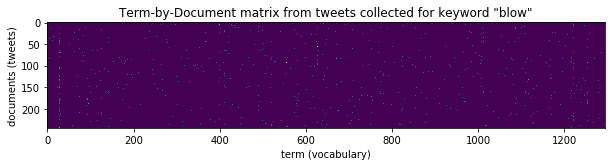

In [45]:
'''
compute the term-by-document matrix and the the dictionary from the collection of 
tweets collected for the first keyword
'''
k1_termdoc, k1_vocab = construct_termdoc(k1_tweets_processed)

# print out the term-by-document matrix
print(k1_termdoc)
# print out the first 5 vocabulary entries
print(' '.join(k1_vocab[-5:]))  # print out only the first 5 vocabulary entries

# visualise the term-by-document matrix
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k1_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))

**Note**. Next, we would like to compute the pairwise distances between every two tweets. This will help us to see how similar tweets are. This is a computational task that would be *not* possible to do if we use the raw tweets.

However, with the term-by-document matrix, each tweet now is vector and corresponds to a row in the term-by-document matrix. Hence, we can use the distance between vectors to compute the distance between tweets. This is also known as the **vector space model** in information retrieval literature.

**Instruction 2.11**. Your tasks are:

1. Define a function to compute and return the Euclidean distance between two vectors as we have learned from the class notes. **(5 marks)**

2. Define a function to compute and return the cosine distance between two vectors as we have learned from the class notes. **(5 marks)**

3. Construct a single function that returns two distance matrices ***euclidean_distance_matrix***, and ***cosine_distance_matrix***, whose elements (i,j) store the Eulidean distance and the cosine distance between tweets i-th and i-jth. **You will need this function for subsequent task**. **(6 marks)**

**[Total mark: 16]**

In [25]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

def Euclidean_distance(x,y):
    '''
    Compute and return the Euclidean distance between two vectors x and y
    '''
    # INSERT YOUR CODE HERE
    euclidean_distance = (np.array(x) - np.array(y))*(np.array(x) - np.array(y))
    
    return np.sqrt(euclidean_distance.sum())

In [26]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
def cosine_distance(x,y):
    '''
    Compute and return the cosine distance between two vectors x and y
    '''
    # INSERT YOUR CODE HERE
    try:
        numerator = (x * y).sum()
        numerator += 0.00
        denominator = np.sqrt((x * x).sum()) * np.sqrt((y * y).sum())
        return numerator / denominator
    except ValueError:
        print("Input vectors are not the same size.")
        return None     

In [27]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
The function takes the termdoc matrix as the input and computes variables called "euclidean_distance_matrix" 
and "cosine_distance_matrix", which are matrices whose elements (i,j) store the Eulidean distance 
and the cosine distance between tweet i-th and i-jth.

Hint: you should store the distance matrices in numpy arrays for easier implementation in subsequent tasks
'''

def compute_distance_matrices(termdoc):
    # INSERT YOUR CODE HERE
    n_rows = termdoc.shape[0]
    euclidean_distance_matrix = np.zeros((n_rows, n_rows))
    cosine_distance_matrix = np.zeros((n_rows, n_rows))
    
    for i in range(n_rows):
        for j in range(n_rows):
            euclidean_distance_matrix[i, j] = euclidean_distance(termdoc[i, :], termdoc[j, :])
            cosine_distance_matrix[i, j] = cosine_distance(termdoc[i, :], termdoc[j, :])
        
    return euclidean_distance_matrix, cosine_distance_matrix

**Instruction 2.12**. 

1. Now you need to compute the distance matrices for **k1_termdoc** and then visualise these distance matrices. **(10 marks)**

2. Explain why cosine distance is always in the range between 0 and 1. **(5 marks)**

3. (HD) Using a scatter plot demonstrate relationship between Euclidean distance and cosine distance. **(5 marks)**

4. (HD) Explain why cosine distance increases if Euclidean distance decreases and vice versa. **(5 marks)**


**[Total mark: 25]**

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the distance matrices for k1_termdoc using the function "compute_distance_matrices"
# INSERT YOUR CODE HERE

# Visualise the distance matrices for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE
k1_euclidean_distance, k1_cosine_distance = compute_distance_matrices(k1_termdoc)

# Visualise the distance matrices for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE - code inserted

#visualising the euclidean distance
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(k1_euclidean_distance)
cbar = fig.colorbar(cax)
ax.set_title("K1 Distance Matrix - Euclidean Distances")

# visualising the cosine distances
fig1, ax1 = plt.subplots(figsize=(8, 8))
cax1 = ax1.imshow(k1_cosine_distance)
cbar1 = fig1.colorbar(cax1)
ax1.set_title("K1 Distance Matrix - Cosine Distances")


In [ ]:
# Explain why cosine distance is always in the range between 0 and 1.
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
#
# The cosine distance cannot be a negative figure because the denominator of the equation are products of 2 absolute values. 
# Furthermore, the cosine distance formula takes in a degree value between 0 and 90. cos(0) = 1 and cos(90) = 0. The angle
# between two term-by-doc vectors cannot be bigger than 90 degrees.


In [ ]:
# Using a scatter plot demonstrate relationship between Euclidean distance and cosine distance.
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# INSERT YOUR CODE HERE
fig, ax = plt.subplots()
ax.scatter(k1_euclidean_distance[:, 0], k1_euclidean_distance[:, 1], s=1, cmap='rainbow');
ax.set_title('Euclidean Distance Scatter Plot')

fig, ax = plt.subplots()
ax.scatter(k1_cosine_distance[:, 0], k1_cosine_distance[:, 1], s=1, cmap='rainbow');
ax.set_title('Cosine Distance Scatter Plot')


In [ ]:
# Explain why cosine distance increases if Euclidean distance decreases and vice versa.
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
#
# It is possible for cosine similarity to have an inverse relationship with euclidean distance. In cases where 
# normalized vectors are used, determining euclidean distance requires applying the formula: 2 x (1 - cosine similarity).
# Based on that equation, it is easy to see that the greater the cosine similarity, the smaller the euclidean distance, vice
# versa.


**Instruction 2.13**. Similar to the example above for the first keyword, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k2_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k2_tweets_processed
'''
# INSERT YOUR CODE HERE
k2_termdoc, k2_vocab = construct_termdoc(k2_tweets_processed)
'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE - code inserted
print(' '.join(k2_vocab[:5]))

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE - code inserted
# visualise the term-by-document matrix
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k2_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[1]))



***Instruction 2.14***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **second** keyword. Store this distance matrix in the variable named ***k2_euclidean_distances*** and **visualise** this matrix.

[**Total mark: 10**]

In [55]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the distance matrix for k1_termdoc using the function "compute_euclidean_distance_matrix"
# INSERT YOUR CODE HERE
k2_euclidean_distance, k2_cosine_distance = compute_distance_matrices(k2_termdoc)

# Visualise the distance matrix for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(k2_euclidean_distance)
cbar = fig.colorbar(cax)
ax.set_title("K2 Distance Matrix ('walk') - Euclidean Distances")

NameError: name 'k2_termdoc' is not defined

**Instruction 2.15**. Similarly, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k3_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 5**]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for keyword "walk"')

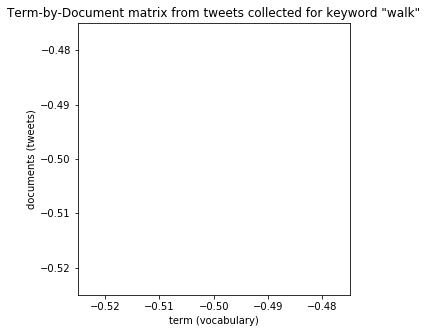

In [57]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k3_tweets_processed
'''
# INSERT YOUR CODE HERE
k3_termdoc, k3_vocab = construct_termdoc(k3_tweets_processed)

'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE
print(' '.join(k3_vocab[-5:]))

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k3_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[1]))

***Instruction 2.16***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **third** keyword. Store this distance matrix in the variable named ***k3_euclidean_distances*** and visualise this matrix.

[**Total mark: 5**]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


Text(0.5, 1.0, 'K3 Distance Matrix - Euclidean Distances')

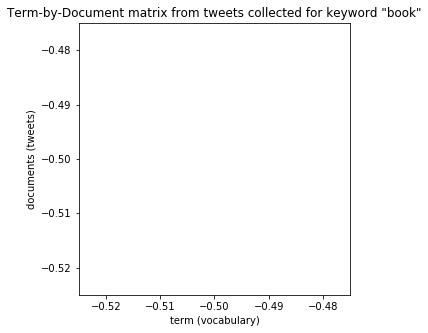

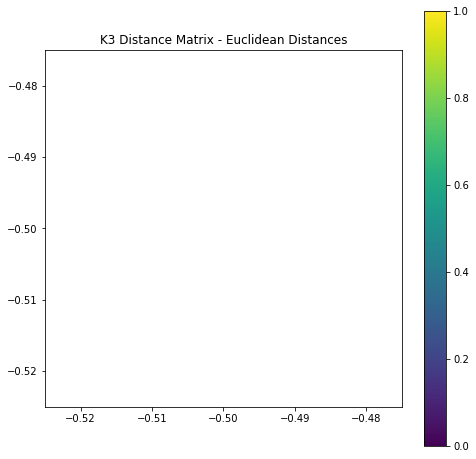

In [58]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the distance matrices for k1_termdoc using the function "compute_distance_matrices"
# INSERT YOUR CODE HERE
k3_termdoc, k3_vocab = construct_termdoc(k3_tweets_processed)
'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE - code inserted
print(' '.join(k3_vocab[:5]))

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE - code inserted
# visualise the term-by-document matrix
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k3_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[2]))

# compute the distance matrices for k3_termdoc using the function "compute_distance_matrices"
# INSERT YOUR CODE HERE
k3_euclidean_distance, k3_cosine_distance = compute_distance_matrices(k3_termdoc)

# Visualise the distance matrix for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(k3_euclidean_distance)
cbar = fig.colorbar(cax)
ax.set_title("K3 Distance Matrix - Euclidean Distances")


***Instruction 2.17 (HD)***. Compare the ranges of the values for cosine and Euclidean distances. Explain why the ranges are different. Think about the best example to explain why cosine distance is more convenient than Euclidean distance for text analysis.

[**Total mark: 5**]

In [ ]:
# Compare the ranges of the values for cosine and Euclidean distances. 
# Explain why the ranges are different. Explain why cosine distance 
# is more convenient than Euclidean distance for text analysis.
#
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
#


### Part 2C: Data Clustering

Thus far in this assignment, we have collected tweets for each keyword and analysed them seperately. We have constructed the term-by-document matrix for each collection of tweets seperately. A fundemantal and common task in data science, analytics, machine learning, science and engineering is **clustering**. This is also known as unsupervised learning or exploratory data analysis as we have learned in our classes.

This part of this assignment will use the Kmeans algorithm learned in our classes to cluster the **entire** colllection of tweets collected for **all** keywords. To do so, we need to compute the **distance** between **any** two pair of tweets. This requires us to compute a **joint** term-by-document matrix for all tweets.

The reason that we **cannot** use the individual term-by-document matrices computed earlier (e.g.,***k1_termdoc, k2_termdoc, k3_termdoc***) for this task is because they have different dictionary sizes. Hence, tweets collected for different keywords have been represented by vectors of different dimension. 

The following piece of codes will help you to inspect these dimensions.

In [ ]:
print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[0]))
print('{} x {}\n'.format(k1_termdoc.shape[0],k1_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[1]))
print('{} x {}\n'.format(k2_termdoc.shape[0],k2_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[2]))
print('{} x {}\n'.format(k3_termdoc.shape[0],k3_termdoc.shape[1]))

**Note**. First, we need to gather all tweets together into a new variable named **all_tweets_processed** using the piece of codes below.

In [ ]:
all_tweets_processed = k1_tweets_processed + k2_tweets_processed + k3_tweets_processed

**Instruction 2.18**. Your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for all tweets stored in ***all_tweets_processed***, print out the first 5 vocabularies and visualise this term-by-document matrix.

[**Total marks: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for all tweets stored 
in all_tweets_processed
'''

all_termdoc, all_vocab = construct_termdoc(all_tweets_processed)

'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE
print(' '.join(all_vocab[:5]))

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE
fig - plt.figure()
ax1 = fig.add_subplot(121)

ax1.imshow(all_termdoc)
ax.set_xlabel('vocabulary')
ax.set_ylabel('documents')
ax.set_title('Term-By-Document matrix for all collected tweets')
ax.xticks(np.arange(min(x), max(x)+1, 250))

**Instruction 2.19**. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for all tweets collected. Store this distance matrix in the variable named ***all_euclidean_distances*** and visualise this matrix.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the Euclidean distance matrix using compute_euclidean_distance_matrix() function

all_euclidean_distances, all_cosine_distances = compute_euclidean_distance_matrix(all_tweets_processed)

# Visualise the distance matrix for this keyword
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(all_euclidean_distances)
cbar = fig.colorbar(cax)
ax.set_title('All Tweets Distance Matrix - Euclidean Distances')

**Instruction 2.20 (HD)**. 
1. Your task is to produce a scatter plot of Euclidean vs cosine distance for all tweets. [**2 marks**]
2. Fit first and second order polynomials to the data in the scatter plot and overplot them. [**3 marks**]
3. Explain why the plotted curves do not go through the centre of the points cloud. [**4 marks**]
4. Which visualisation technique would be better to use here? [**1 mark**]

[**Total mark: 10**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# 1. Your task is to produce a scatter plot of Euclidean vs cosine distance for all tweets.
# INSERT YOUR CODE HERE
colors = ("red", "green", "blue")
plt.scatter(all_euclidean_distances, all_cosine_distances, c = colors, alpha = 0.7)
plt.title('Euclidean Vs Cosine Distance For All Tweets')
plt.xlabel('Euclidean Distances')
plt.ylabel('Cosine Distances')

# 2. Fit a second order polynomial to the data in the scatter plot and overplot it. 
# INSERT YOUR CODE HERE
x = np.array([x**i for i in range(3)]).T
regr = linear_model.LinearRegression()
regr.fit(all_euclidean_distances, all_cosine_distances)
plt.plot(x, regr.predict(x), label = "2nd order polynomial")

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
#3. Explain why the plotted curves do not go through the centre of the points cloud.
#4. Which visualisation technique would be better to use here?
# INSERT YOUR COMMENTS HERE
#


**Note**. Next, we use Kmeans algorithm to cluster all tweets stored in term-by-document matrix ***all_termdoc***. An important requirement for the Kmeans is the specification of the number of clusters which will be specified the variable **n_clusters**.

The following piece of codes will initialise a ***kmeans*** object to be used for subsequent clustering task.

In [ ]:
'''
Initialise a kmeans object  from scikit-lean package
'''
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5, max_iter=3000,
                verbose=True, tol=0.000001, random_state=123456)


**Instruction 2.21**. Your task is to use the variable ***kmeans*** to perform clustering on the data stored in the variable ***all_termdoc***.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

'''
Use the variable kmeans to perform clustering on the data stored in the variable all_termdoc
Hint: revise the practical session on Kmeans algorithm or check out the documentation from scikit-learn
for Kmeans algorithm.
'''
# INSERT YOUR CODE HERE
kmeans.fit(all_termdoc)
x_kmeans = kmeans.predict(all_termdoc)

ax.scatter(all_termdoc[:, 0], all_termdoc[:, ], c=x_kmeans, s=10, cmap='viridis')
ax.set_title('Clustered Tweets')

**Instruction 2.22**. Write your codes to print out the cluster centers.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to print out the cluster centers.
'''
# INSERT YOUR CODE HERE
def find_clusters (document, cluster_num):
    randomizer = np.random.RandomState(2)
    selection = randomizer.permutation(document.shape[0])[:cluster_num]
    centers = document[selection]
    
    while True:
        labels = pairwise_distances_argmin(document, centers)
        
        new_centers = np.array([document[labels == selection].mean(0)
                                for selection in range(cluster_num)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

# printing out the cluster centers
centers, labels = find_clusters(all_termdoc, 3)

print(f"The cluster centers are: {centers}.")


**Instruction 2.23 (HD)**. Explain below why visualising the clusters here is hard to do in this case.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# Explain below why visualising the clusters here is hard to do in this case.
# INSERT YOUR COMMENT HERE

# Visualizing clusters in this case is difficult because the values are all superimposed on one another.


**Instruction 2.24 (HD)**. Nevertheless, it is possible to visualise the structure of the cluster centres - surprisingly, using bar charts. Each vector component in the cluster centre vectors corresponds to a word in the dictionary. The value (amplitude) of the vector component for each particular word in the dictionary shows the strength of presence of a word in the cluster.
In this task, you want to:
1. Plot bar charts for each of the three clusters, obtained from KMeans, where each bar chart has 20 strongest words sorted by their presence strength. [**5 marks**]
2. Explain the bar charts from the point of view of chosen keywords, English grammar and our text preprocessing routine. [**5 marks**]

[**Total mark: 10**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# 1. Plot bar charts for each of the three clusters, obtained from KMeans, 
# where each bar chart has 20 strongest words sorted by their presence strength.
# INSERT YOUR CODE HERE
def top_20_analysis (cluster_num):
    sort_center = np.argsort(centers[cluster_num])
    top_20_index = []
    for i in range(len(sort_center) - 20, len(sort_center)):
        top_20_index.append(sort_center[i])

    # 2. getting the words that match those indices
    top_20_words = []
    for i in top_20_index:
        top_20_words.append(all_vocab[i])

    # 3. getting the 'word strength' of each of those top 20 words
    top_20_strength = []
    for i in top_20_index:
        top_20_strength.append(centers[cluster_num][i])
        
    return top_20_index, top_20_words, top_20_strength

def make_barchart (cluster_num):
    c1_t20i, c1_t20w, c1_t20s = top_20_analysis(cluster_num)

    x_pos = np.arange(len(c1_t20s))

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.bar(x_pos, c1_t20s, color='purple', align='center')

    ax.set_xlabel("Top 20 Words")
    ax.set_ylabel("Strength of Word")
    ax.set_title(f"Top 20 Words in Cluster {cluster_num + 1} by Strength Level")

    ax.set_xticks(x_pos)
    plt.xticks(rotation=90)
    ax.set_xticklabels(c1_t20w)

make_barchart(0)
make_barchart(1)
make_barchart(2)



In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# Explain the bar charts from the point of view of chosen keywords, English grammar 
# and our text preprocessing routine.
# INSERT YOUR COMMENT HERE
#
# The bar chart is a nice visual representation of the fact that the most commonly used English words (e.g the, and)
# appear most frequently in the tweets. Because the pre-processing function only removes words with less than 3 characters,
# those commonly used words were not caught by the function. Furthermore, the fact that strength levels of the chosen 
# keywords are similar (between 1 and 7) in each cluster perhaps indicates that such words are commonly used together
# in phrases/sentences.

**Instruction 2.25**. Write your codes to print out the first **200** cluster labels assigned to the first 200 tweets.

[**Total marks: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to print out the first **200** cluster labels assigned to the first 200 tweets.
'''
# INSERT YOUR CODE HERE
label = kmeans.predict(all_termdoc)

print("== Cluster Labels for the First 200 Tweets ==")
for i in range(200):
    print(f" Cluster Label for tweet {i+1}: Cluster {label[i]}")



**Instruction 2.26**. Next, we would like to obtain the quality of our clustering results. Write your code to obtain the labels of tweets for each keyword and store the labels in three new variables ***k1_labels***, ***k2_labels*** and ***k3_labels***, respectively.

**[Total marks: 5]**

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

'''
Write your code to obtain the labels of tweets for each keyword
and store the labels of the first keyword in ***k1_labels***, 
the labels of the second keyword in ***k2_labels*** and
the labels of the third keyword in ***k3_labels***.
'''
# INSERT YOUR CODE HERE


**Instruction 2.27 (D)**. We examine what is the proprotion of tweets from different keywords (or categories) appear in the **first** cluster. Remember that **0** is the label for the first cluster (**1** for the second and **2** for the third clusters). Your tasks are:

1. Write your code to obtain the list of tweet indices of each keyword that are assigned to the first cluster. **(3 marks)**

2. Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the first cluster. **(2 marks)**

**[Total mark: 5]**

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to obtain the list of tweet indices of each keyword that are assigned to the first cluster.
Hint: you might want to use numpy.where function.
'''
# obtain the list of tweet indices of keyword k1 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k1_labels
k1_idx_label0 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k2 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k2_labels
k2_idx_label0 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k3 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k3_labels
k3_idx_label0 = # INSERT YOUR CODE HERE


In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the first cluster.
Hint: you need to plot a bar chart with three bars, 
each bar represents the number of tweets of each keyword that are assigned to the first cluster.
'''
# INSERT YOUR CODE HERE


**Instruction 2.28 (D)**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **second** cluster and plot a bar chart visualise this information.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k1_labels
k1_idx_label1 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k2 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k2_labels
k2_idx_label1 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k3 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k3_labels
k3_idx_label1 = # INSERT YOUR CODE HERE

# Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the second cluster
# INSERT YOUR CODE HERE


**Instruction 2.29 (D)**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **third** cluster and plot a bar chart visualise this information.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k1_labels
k1_idx_label2 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k2 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k2_labels
k2_idx_label2 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k3 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k3_labels
k3_idx_label2 = # INSERT YOUR CODE HERE

# Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the third cluster
# INSERT YOUR CODE HERE


### END OF ASSIGNMENT 2 NOTEBOOK

----